In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    precision_recall_curve,
    roc_curve,
    roc_auc_score,
    f1_score,
    auc,
)
from sklearn.base import clone
from sklearn.neural_network import MLPClassifier


sns.set(style="whitegrid")
sns.set_color_codes("pastel")

In [3]:
full_train = pd.read_csv("../datasets/train_clean.csv")

to_drop = [
    "Name",
    "Ticket",
    "Embarked",
    "PassengerId",
    *[c for c in full_train if "cabin" in c.lower()],
]

full_train.drop(columns=to_drop, inplace=True)

target_col = "Survived"

X = full_train.drop(target_col, axis=1)
y = full_train[target_col]

X_train, y_train = X, y

model = MLPClassifier(
    random_state=42,
    solver="adam",
    shuffle=True,
)

param_grid = {
    "hidden_layer_sizes": [
        (100, 100, 100),
        (100, 100, 100, 100),
        (100, 100, 100, 100, 100),
    ],
    "alpha": [0.0001, 0.00001],
    "learning_rate": ["constant", "adaptive"],
    "learning_rate_init": [0.01, 0.001, 0.0001],
    "n_iter_no_change": [10, 25, 50, 100],
}

grid_search = GridSearchCV(
    model, param_grid, n_jobs=-1, cv=5, scoring="accuracy", verbose=10
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 144 candidates, totalling 720 fits


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) 

[CV 2/5; 1/144] START alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate=constant, learning_rate_init=0.01, n_iter_no_change=10
[CV 2/5; 1/144] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate=constant, learning_rate_init=0.01, n_iter_no_change=10;, score=0.798 total time=   1.1s
[CV 5/5; 2/144] START alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate=constant, learning_rate_init=0.01, n_iter_no_change=25
[CV 5/5; 2/144] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate=constant, learning_rate_init=0.01, n_iter_no_change=25;, score=0.814 total time=   1.6s
[CV 4/5; 3/144] START alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate=constant, learning_rate_init=0.01, n_iter_no_change=50
[CV 4/5; 3/144] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate=constant, learning_rate_init=0.01, n_iter_no_change=50;, score=0.775 total time=   3.8s
[CV 2/5; 5/144] START alpha=0.0001, hidden_layer_sizes=(100, 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 2/144] START alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate=constant, learning_rate_init=0.01, n_iter_no_change=25
[CV 1/5; 2/144] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate=constant, learning_rate_init=0.01, n_iter_no_change=25;, score=0.764 total time=   3.5s
[CV 1/5; 4/144] START alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate=constant, learning_rate_init=0.01, n_iter_no_change=100
[CV 1/5; 4/144] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate=constant, learning_rate_init=0.01, n_iter_no_change=100;, score=0.775 total time=   3.8s
[CV 4/5; 5/144] START alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate=constant, learning_rate_init=0.001, n_iter_no_change=10
[CV 4/5; 5/144] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate=constant, learning_rate_init=0.001, n_iter_no_change=10;, score=0.792 total time=   4.3s
[CV 3/5; 7/144] START alpha=0.0001, hidden_layer_sizes=(1

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 1/144] START alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate=constant, learning_rate_init=0.01, n_iter_no_change=10
[CV 5/5; 1/144] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate=constant, learning_rate_init=0.01, n_iter_no_change=10;, score=0.802 total time=   1.4s
[CV 1/5; 3/144] START alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate=constant, learning_rate_init=0.01, n_iter_no_change=50
[CV 1/5; 3/144] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate=constant, learning_rate_init=0.01, n_iter_no_change=50;, score=0.775 total time=   3.7s
[CV 4/5; 4/144] START alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate=constant, learning_rate_init=0.01, n_iter_no_change=100
[CV 4/5; 4/144] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate=constant, learning_rate_init=0.01, n_iter_no_change=100;, score=0.775 total time=   4.0s
[CV 5/5; 6/144] START alpha=0.0001, hidden_layer_sizes=(100

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 2/144] START alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate=constant, learning_rate_init=0.01, n_iter_no_change=25
[CV 2/5; 2/144] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate=constant, learning_rate_init=0.01, n_iter_no_change=25;, score=0.781 total time=   3.1s
[CV 5/5; 3/144] START alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate=constant, learning_rate_init=0.01, n_iter_no_change=50
[CV 5/5; 3/144] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate=constant, learning_rate_init=0.01, n_iter_no_change=50;, score=0.819 total time=   3.8s
[CV 3/5; 5/144] START alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate=constant, learning_rate_init=0.001, n_iter_no_change=10
[CV 3/5; 5/144] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate=constant, learning_rate_init=0.001, n_iter_no_change=10;, score=0.826 total time=   1.8s
[CV 3/5; 6/144] START alpha=0.0001, hidden_layer_sizes=(100

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) 

[CV 3/5; 1/144] START alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate=constant, learning_rate_init=0.01, n_iter_no_change=10
[CV 3/5; 1/144] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate=constant, learning_rate_init=0.01, n_iter_no_change=10;, score=0.809 total time=   1.5s
[CV 3/5; 3/144] START alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate=constant, learning_rate_init=0.01, n_iter_no_change=50
[CV 3/5; 3/144] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate=constant, learning_rate_init=0.01, n_iter_no_change=50;, score=0.798 total time=   3.8s
[CV 1/5; 5/144] START alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate=constant, learning_rate_init=0.001, n_iter_no_change=10
[CV 1/5; 5/144] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate=constant, learning_rate_init=0.001, n_iter_no_change=10;, score=0.758 total time=   3.1s
[CV 2/5; 6/144] START alpha=0.0001, hidden_layer_sizes=(100

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) 

[CV 4/5; 1/144] START alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate=constant, learning_rate_init=0.01, n_iter_no_change=10
[CV 4/5; 1/144] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate=constant, learning_rate_init=0.01, n_iter_no_change=10;, score=0.770 total time=   0.9s
[CV 4/5; 2/144] START alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate=constant, learning_rate_init=0.01, n_iter_no_change=25
[CV 4/5; 2/144] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate=constant, learning_rate_init=0.01, n_iter_no_change=25;, score=0.764 total time=   3.3s
[CV 3/5; 4/144] START alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate=constant, learning_rate_init=0.01, n_iter_no_change=100
[CV 3/5; 4/144] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate=constant, learning_rate_init=0.01, n_iter_no_change=100;, score=0.798 total time=   3.8s
[CV 1/5; 6/144] START alpha=0.0001, hidden_layer_sizes=(100

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) 

Best Parameters: {'alpha': 0.0001, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.0001, 'n_iter_no_change': 10}
Best Score: 0.8167


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [4]:
import joblib

joblib.dump(
    grid_search,
    f"../models/{grid_search.best_estimator_.__class__.__name__}_{grid_search.best_score_ * 100:.4f}.joblib",
)

['../models/MLPClassifier_81.6683.joblib']

In [5]:
model_name = grid_search.estimator.__class__.__name__

get_best = True  # get the best model or the latest model

# get files in models sorted by last modified
if get_best:
    import os
    import re

    files = os.listdir("../models")
    files = [f for f in files if re.match(f"{model_name}_.*\.joblib", f)]
    files = sorted(
        files, key=lambda x: re.search(r"_(\d+\.\d+)\.joblib", x).group(1), reverse=True
    )
    file_name = files[0]
else:
    import os
    import re

    files = os.listdir("../models")
    files = [f for f in files if re.match(f"{model_name}_.*\.joblib", f)]
    files = sorted(
        files, key=lambda x: os.path.getmtime(os.path.join("models", x)), reverse=True
    )
    file_name = files[0]
loaded_grid_search = joblib.load(f"../models/{file_name}")

In [6]:
for k, v in loaded_grid_search.cv_results_.items():
    print(k, v, sep="\t")

mean_fit_time	[1.29144759 3.03442302 3.74649854 3.87309227 3.14311037 4.12936921
 3.93376122 3.76943178 3.52564254 3.45640607 3.41645403 3.43207254
 1.13124471 2.86696568 3.76826372 3.78160763 2.91561055 3.99228134
 3.84595895 3.68636069 3.68168354 3.77311072 3.76916218 3.82120657
 1.68285637 3.69100604 5.12413735 5.39138041 3.98289094 5.57500763
 6.47875896 7.17351236 6.74859285 6.22947068 5.39258356 5.15012002
 1.62900109 3.88283434 5.61417813 5.92158699 4.22577581 6.08806705
 6.00631533 5.88813357 6.73343496 6.87457013 6.36535616 6.80959687
 3.21950612 6.80990887 7.84940205 7.35983181 3.99921174 6.77622762
 6.96129532 7.12247419 7.04512658 7.09374318 7.07710991 7.11681519
 2.42894173 5.78415446 7.07854218 7.0462009  3.84692497 6.89764757
 7.02719021 7.15310364 7.11544533 7.1090806  7.08768115 7.02352448
 1.73487706 3.21802521 3.90324521 3.8730742  2.75172515 3.97789817
 3.89374471 3.80536032 3.84411945 3.80997834 3.89268346 3.87324681
 1.64741335 3.1118     3.80375361 3.93320699 2.7

In [7]:
real_test = pd.read_csv("../datasets/test_clean.csv")

In [8]:
real_test.drop(columns=list(set(to_drop) - {"PassengerId"}), inplace=True)

In [9]:
pred = pd.DataFrame(best_model.predict(real_test.drop(columns=["PassengerId"]))).rename(
    columns={0: "Survived"}
)

In [10]:
# get probabilities
probs = best_model.predict_proba(X_train)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# predict class values
yhat = best_model.predict(X_train)

# calculate roc-auc score
lr_auc = roc_auc_score(y_train, probs)

# calculate roc curve
ns_fpr, ns_tpr, _ = roc_curve(y_train, probs)

# get f1 score
lr_f1 = f1_score(y_train, best_model.predict(X_train))

# get auc score
lr_auc = auc(ns_fpr, ns_tpr)

# get precision & recall
lr_precision, lr_recall, _ = precision_recall_curve(y_train, probs)

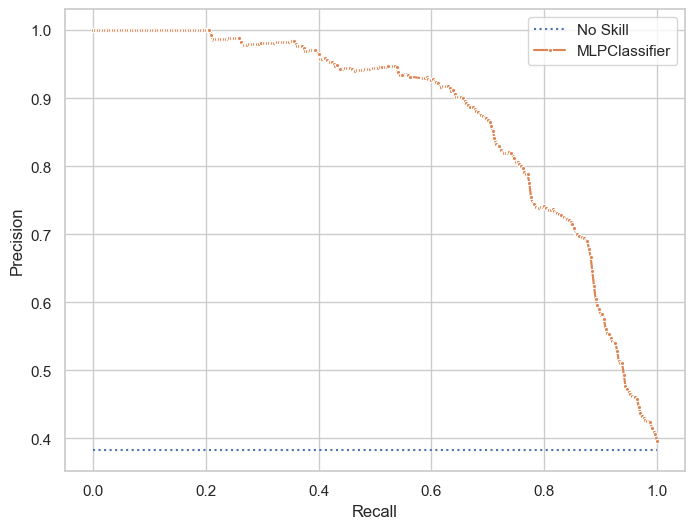

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get no-skill line
no_skill = len(y_train[y_train == 1]) / len(y_train)

# Set the style
sns.set(style="whitegrid")

# Plot the precision-recall curves
plt.figure(figsize=(8, 6))
sns.lineplot(x=[0, 1], y=[no_skill, no_skill], linestyle="dotted", label="No Skill")
sns.lineplot(x=lr_recall, y=lr_precision, marker=".", label=model_name)

# Set axis labels
plt.xlabel("Recall")
plt.ylabel("Precision")

# Show the legend
plt.legend()

# Show the plot
plt.show()

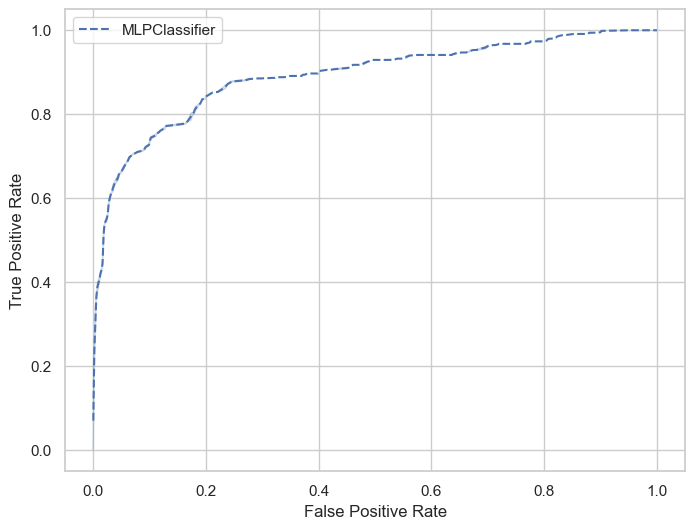

In [12]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
sns.lineplot(x=ns_fpr, y=ns_tpr, linestyle="--", label=model_name)

# Set axis labels
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

# Show the legend
plt.legend()

# Show the plot
plt.show()

In [13]:
pd.concat([real_test[["PassengerId"]], pred], axis=1).to_csv(
    f"../outs/{best_model.__class__.__name__}_{grid_search.best_score_ * 100:.4f}.csv",
    index=False,
)

[CV 5/5; 79/144] START alpha=1e-05, hidden_layer_sizes=(100, 100, 100), learning_rate=constant, learning_rate_init=0.001, n_iter_no_change=50
[CV 5/5; 79/144] END alpha=1e-05, hidden_layer_sizes=(100, 100, 100), learning_rate=constant, learning_rate_init=0.001, n_iter_no_change=50;, score=0.802 total time=   3.9s
[CV 3/5; 81/144] START alpha=1e-05, hidden_layer_sizes=(100, 100, 100), learning_rate=constant, learning_rate_init=0.0001, n_iter_no_change=10
[CV 3/5; 81/144] END alpha=1e-05, hidden_layer_sizes=(100, 100, 100), learning_rate=constant, learning_rate_init=0.0001, n_iter_no_change=10;, score=0.815 total time=   3.9s
[CV 1/5; 83/144] START alpha=1e-05, hidden_layer_sizes=(100, 100, 100), learning_rate=constant, learning_rate_init=0.0001, n_iter_no_change=50
[CV 1/5; 83/144] END alpha=1e-05, hidden_layer_sizes=(100, 100, 100), learning_rate=constant, learning_rate_init=0.0001, n_iter_no_change=50;, score=0.798 total time=   3.9s
[CV 4/5; 84/144] START alpha=1e-05, hidden_layer_si